In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train =pd.read_csv(r"C:\Users\harin\Downloads\train (2).csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.skew()

C:\Users\harin\AppData\Local\Temp\ipykernel_3512\3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


PassengerId      0.002020
CryoSleep        0.591110
Age              0.419097
VIP              6.300900
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
Transported     -0.014497
dtype: float64

In [5]:
train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1,inplace=True)

In [6]:
train.skew()

C:\Users\harin\AppData\Local\Temp\ipykernel_3512\3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


PassengerId    0.002020
CryoSleep      0.591110
Age            0.419097
VIP            6.300900
Transported   -0.014497
dtype: float64

In [7]:
q1=train['VIP'].quantile(0.25)
q2=train['VIP'].quantile(0.75)
q1

0.0

In [8]:
train['VIP']=np.where(train['VIP']<q1,q1,train['VIP'])
train['VIP']=np.where(train['VIP']>q2,q2,train['VIP'])
train.skew()

C:\Users\harin\AppData\Local\Temp\ipykernel_3512\3489825411.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


PassengerId    0.002020
CryoSleep      0.591110
Age            0.419097
VIP            0.000000
Transported   -0.014497
dtype: float64

In [9]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,0.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True


In [10]:
train.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [11]:
train.replace('-','nan')
train.replace('na','nan')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,0.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,0.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,False


In [12]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0],inplace=True)

In [13]:
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0],inplace=True)

In [14]:
train[['Deck', 'Num','Side']] = train['Cabin'].str.split('/', expand=True)

In [15]:
train=train.drop(['Cabin'],axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,0.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,F,1,S


In [16]:
train['Deck'].fillna(train['Deck'].mode()[0],inplace=True)

In [17]:
train['Num'].fillna(train['Num'].mode()[0],inplace=True)

In [18]:
train['Destination'].fillna(train['Destination'].mode()[0],inplace=True)

In [19]:
train.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age            179
VIP            203
Transported      0
Deck             0
Num              0
Side           199
dtype: int64

In [20]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [21]:
train['Side'].fillna(train['Side'].mode()[0],inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP            203
Transported      0
Deck             0
Num              0
Side             0
dtype: int64

In [23]:
train.drop(['VIP'],axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,True,F,1,S


In [25]:
train['CryoSleep'].replace({True:1,False:0},inplace=True)

In [26]:
train['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2},inplace=True)

In [27]:
train['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2},inplace=True)

In [28]:
train['Side'].replace({'P':1,'S':0},inplace=True)

In [29]:
train['Deck'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7},inplace=True)

In [30]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Num,Side
0,0001_01,0,0,0,39.0,False,1,0,1
1,0002_01,1,0,0,24.0,True,5,0,0
2,0003_01,0,0,0,58.0,False,0,0,0
3,0003_02,0,0,0,33.0,False,0,0,0
4,0004_01,1,0,0,16.0,True,5,1,0


In [31]:
cor=train.corr()
cor

,HomePlanet,CryoSleep,Destination,Age,Transported,Deck,Side
HomePlanet,1.000000,-0.040494,-0.246953,-0.130438,-0.102240,0.574632,0.038960
CryoSleep,-0.040494,1.000000,0.096287,-0.070736,0.460132,0.018806,-0.023858
Destination,-0.246953,0.096287,1.000000,0.006619,0.108152,-0.183707,-0.012979
Age,-0.130438,-0.070736,0.006619,1.000000,-0.074249,-0.241692,-0.011758
Transported,-0.102240,0.460132,0.108152,-0.074249,1.000000,-0.114941,-0.101397
Deck,0.574632,0.018806,-0.183707,-0.241692,-0.114941,1.000000,0.025316
Side,0.038960,-0.023858,-0.012979,-0.011758,-0.101397,0.025316,1.000000


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


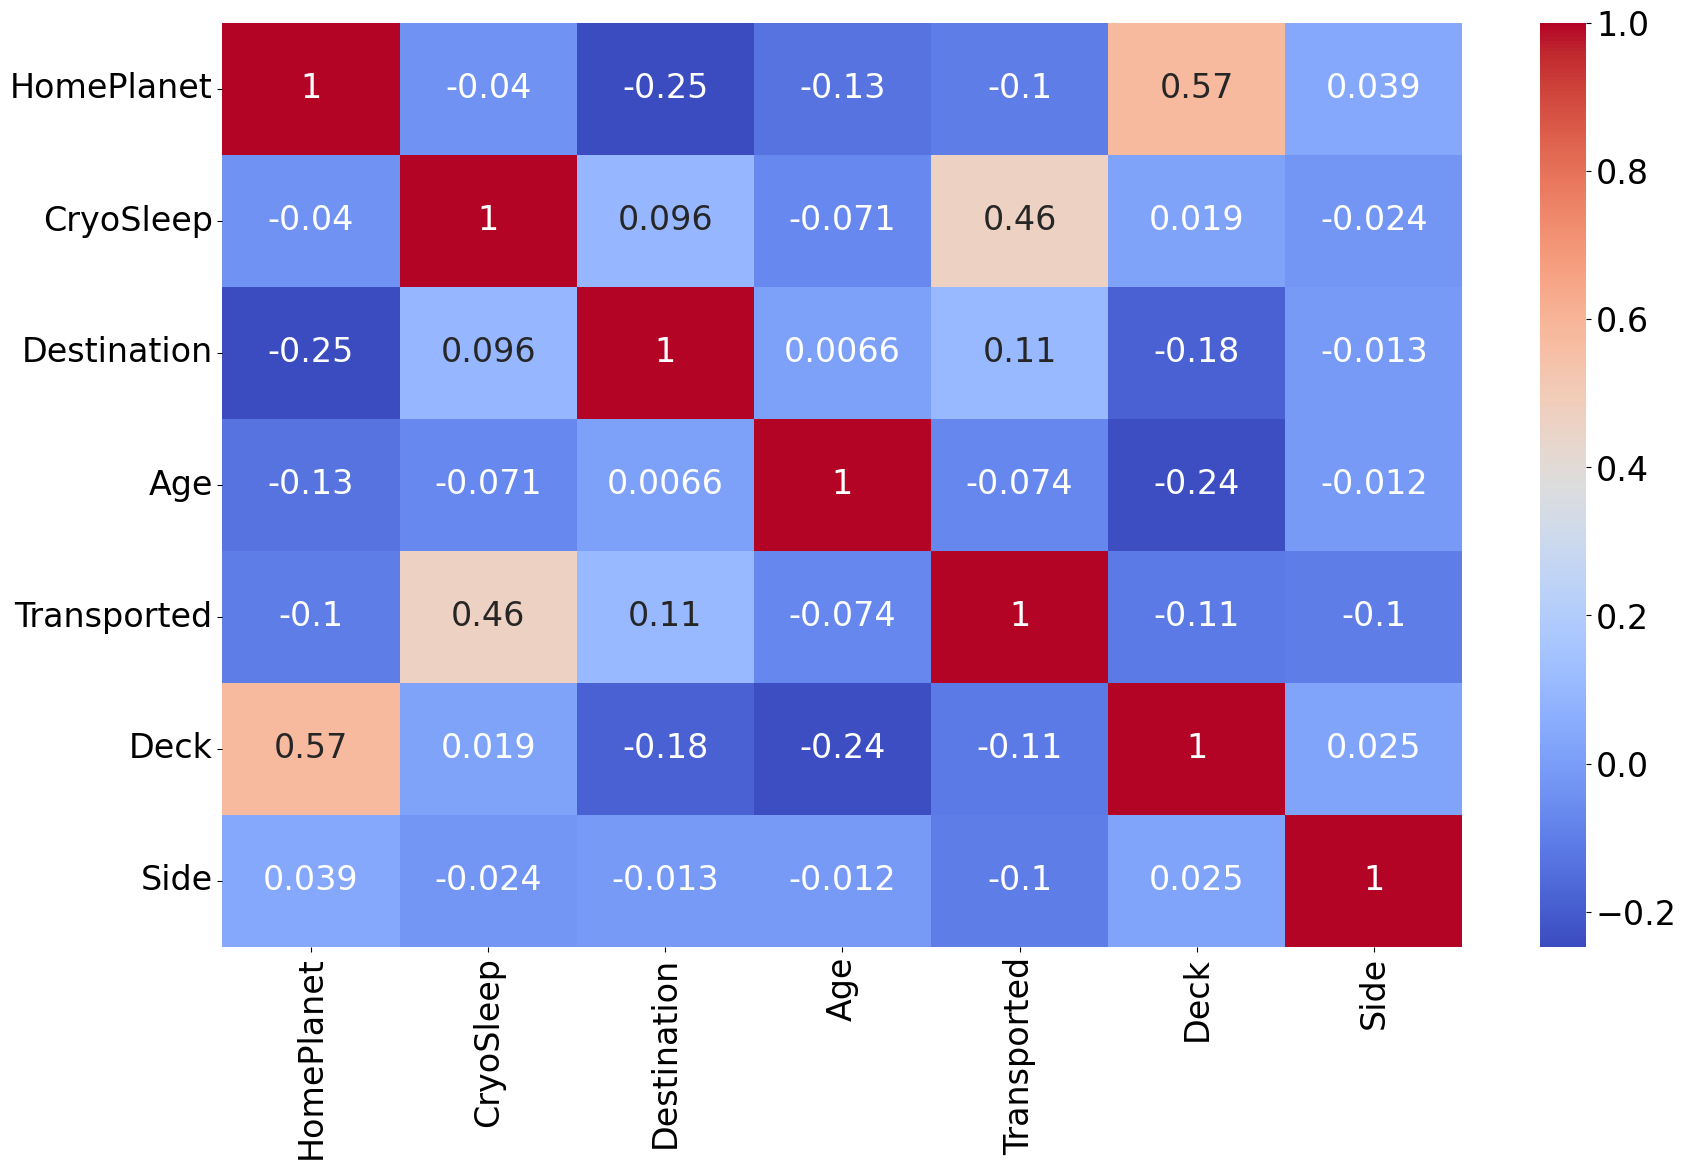

In [32]:
font={"size":24,"family":"normal"}
mlt.rc('font',**font)
plt.figure(figsize=(20,12))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [33]:
train.drop(['CryoSleep',"Num"],axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,HomePlanet,Destination,Age,Transported,Deck,Side
0,0001_01,0,0,39.0,False,1,1
1,0002_01,1,0,24.0,True,5,0
2,0003_01,0,0,58.0,False,0,0
3,0003_02,0,0,33.0,False,0,0
4,0004_01,1,0,16.0,True,5,0


In [35]:
x_train=train.drop('Transported',axis=1)
y_train=train['Transported']

In [36]:
x_train
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [37]:
test=pd.read_csv(r"C:\Users\harin\Downloads\test (3).csv")

In [38]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [39]:
test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','VIP'],axis=1,inplace=True)

In [40]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0


In [41]:
test.isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
Age             91
dtype: int64

In [42]:
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0],inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0],inplace=True)
test[['Deck', 'Num','Side']] = test['Cabin'].str.split('/', expand=True)
test.drop(['Cabin'],axis=1,inplace=True)
test.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,F,5,S


In [43]:
test['Deck'].fillna(test['Deck'].mode()[0],inplace=True)
test.drop(['Num'],axis=1,inplace=True)
test['Side'].fillna(test['Side'].mode()[0],inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0],inplace=True)

In [44]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [45]:
test.skew()

C:\Users\harin\AppData\Local\Temp\ipykernel_3512\1515727625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


PassengerId    0.001058
CryoSleep      0.579016
Age            0.490038
dtype: float64

In [47]:
test.drop(['CryoSleep'],axis=1,inplace=True)

In [48]:
test['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2},inplace=True)
test['Destination'].replace({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2},inplace=True)
test['Deck'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7},inplace=True)
test['Side'].replace({"P":1,'S':0},inplace=True)

In [49]:
test.head()

,PassengerId,HomePlanet,Destination,Age,Deck,Side
0,0013_01,1,0,27.0,6,0
1,0018_01,1,0,19.0,5,0
2,0019_01,0,2,31.0,2,0
3,0021_01,0,0,38.0,2,0
4,0023_01,1,0,20.0,5,0


In [50]:
x_test=test.iloc[:,0:]

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=model.predict(x_test)

In [54]:
y_pred

array([False,  True,  True, ...,  True,  True, False])

In [55]:
model.score(x_test,y_pred)

1.0

In [57]:
data=pd.DataFrame(y_pred,columns=['Transported'])

In [58]:
data1=pd.DataFrame(test.PassengerId)

In [59]:
result=pd.concat([data1,data],axis=1)

In [60]:
result

,PassengerId,Transported
0,0013_01,False
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
result.to_csv('kagglespaceshiptitanic.csv',index=False)